In [99]:
import numpy as np
import pandas as pd
import Mongo_Connector as mongo
import tlsh
from icecream import ic
import matplotlib.pyplot as plt
import ssdeep
import warnings
warnings.filterwarnings('ignore')
db = mongo.init("portainer", port=32768)
df = pd.DataFrame(list(db["scicore"].find({})))
machoke = pd.DataFrame(list(db["machoke"].find({})))
df = df.merge(machoke[['SHA256', 'machoke']], on='SHA256', how='left')

# Scicore Comparison

This notebook is used to compare the tlsh and ssdeep hashes of the scicore dataset.
First I will compare the tlsh hashes and then the ssdeep hashes.



In [100]:
df

,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc,strings,machoke
0,0,DIAMOND,bdbbc7d10475610a47665613a15b523692f2e586e495bf...,1744592,{'ssdeep': '24576:0ZgkO8W6krEazzEHRyE5fx5j0Gkm...,sdhash hash,{'tlsh': 'T170858D1B66820CB9C492D53467E797F268...,Machoc hash,{'strings': 'T1C844E9E35DC61D198DD65718A3A7936...,NaN
1,1,DIAMOND,3e5b9caaa8ec0488d0ef6649fa3205af16cd286921fdf3...,1264648,{'ssdeep': '24576:N7RayWHeZhpVZNmHQ/0R223Vcqem...,sdhash hash,{'tlsh': 'T1FB457E47FAC358A8C097D538466FA1367A...,Machoc hash,{'strings': 'T1FC1409F28DC02D14C5E7532DA3D6866...,NaN
2,2,DIAMOND,3e7c7a7415567a30a6131c959448e136c1c4cd25e2755d...,7963768,{'ssdeep': '98304:O4g2u6YzoSU6Zr5CqeWRP07lRNMc...,sdhash hash,{'tlsh': 'T1A3868E03E687A468C8A6C43813DB91B3ED...,Machoc hash,{'strings': 'T1C7751AD30D8F2C209CAE73507295D13...,NaN
3,3,DIAMOND,6336bd767371ef854def756641f8af86dd591e62170eb8...,1599192,{'ssdeep': '24576:39vHSut4l6xFkIRp1IzwbIPGVild...,sdhash hash,{'tlsh': 'T112759F1B6BA208ADC892D53457E796F26C...,Machoc hash,{'strings': 'T1CD44E9E34CC62D198DD65718A3A7926...,NaN
4,4,OCaml,3eee2da2d713d971e6618b2f089d08e495c0cd8ec722f7...,13173764,{'ssdeep': '49152:lZBmaeQesTwicgVOMB4aJZhYw2UN...,sdhash hash,{'tlsh': 'T1F6D6E80EBB470662CD9809FE8CD5868FD6...,Machoc hash,{'strings': 'T1AC75D50CF4B0A5622CC2F4AFFB0DF68...,NaN
...,...,...,...,...,...,...,...,...,...,...
2061,1986,help2man,16d420a69b74f3ec081ffae840653e2246ab4758d85e38...,20063,{'ssdeep': '384:sBLdkCCJ8rwQ0EvrX+rjZbOeL3npSe...,sdhash hash,{'tlsh': 'T12C92F905EA1A8677B25301F77FDAA4C097...,Machoc hash,{'strings': 'T19292F818E81B4677B25345F37B8A548...,{'machoke': 'Not a valid binary file /users/st...
2062,1987,help2man,982697334fef2dab34b4393832e7011a74a92ff05fd426...,20051,{'ssdeep': '384:sDLjOCCJ8/eQrvPX+rjZb2OL3npSeL...,sdhash hash,{'tlsh': 'T192920A04EA1A8677B25301F77FDA94C097...,Machoc hash,NaN,{'machoke': 'Not a valid binary file /users/st...
2063,1987,help2man,982697334fef2dab34b4393832e7011a74a92ff05fd426...,20051,{'ssdeep': '384:sDLjOCCJ8/eQrvPX+rjZb2OL3npSeL...,sdhash hash,{'tlsh': 'T192920A04EA1A8677B25301F77FDA94C097...,Machoc hash,NaN,{'machoke': 'Not a valid binary file /users/st...
2064,1988,ChimPipe,6cbb727cbfb1fb6335e4439ae7810e143e1bcc69b05ca0...,76135,{'ssdeep': '1536:Sw5j4LB3dUalDarob+tltydxgjmzB...,sdhash hash,{'tlsh': 'T101734B13B0959D7AC4478A301AC7823B99...,Machoc hash,{'strings': 'T1CD32B7163C74AAB109D289B2B754859...,NaN


Text(0.5, 1.0, 'Family distribution of the Scicore samples')

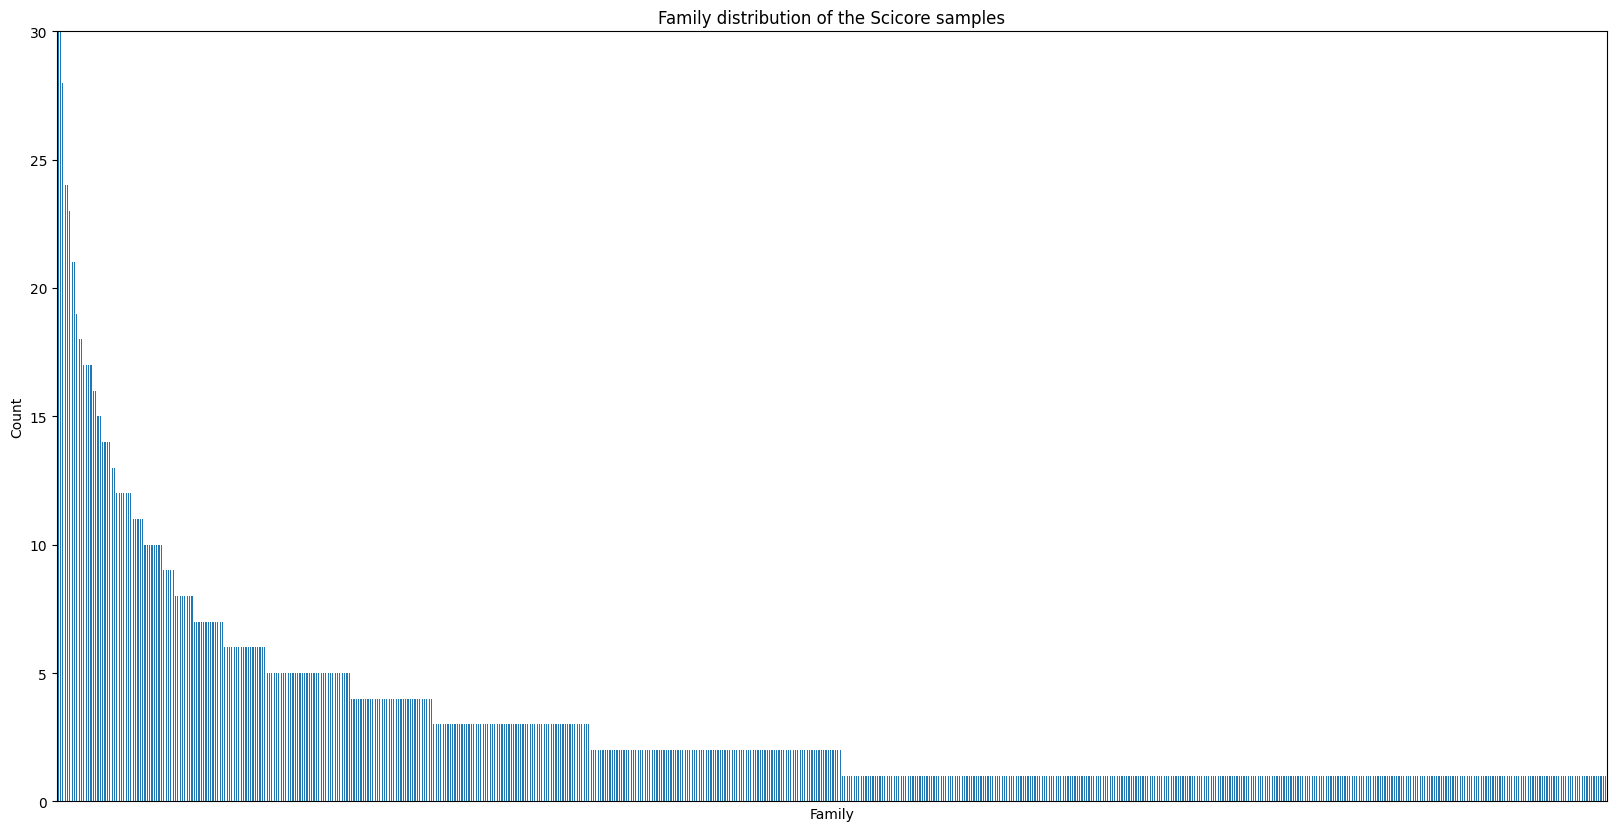

In [101]:
family_counts = df['family'].value_counts()

# Filter the families with more than one entry
scicore_filtered = df[df['family'].map(family_counts) > 1]
family_counts.plot(kind='bar', figsize=(20, 10))
plt.xticks([])
plt.ylim(0, 30)
plt.xlabel('Family')
plt.ylabel('Count')
plt.title('Family distribution of the Scicore samples')
#plt.rcParams.update({'font.size': 32})

# Scicore Filtered

This is the filtered dataset with only families that have more than one entry. Since comparing the binary to itself can be done with SHA256, I will skip the families with only 1 entry.

In [102]:
scicore_filtered

,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc,strings,machoke
0,0,DIAMOND,bdbbc7d10475610a47665613a15b523692f2e586e495bf...,1744592,{'ssdeep': '24576:0ZgkO8W6krEazzEHRyE5fx5j0Gkm...,sdhash hash,{'tlsh': 'T170858D1B66820CB9C492D53467E797F268...,Machoc hash,{'strings': 'T1C844E9E35DC61D198DD65718A3A7936...,NaN
1,1,DIAMOND,3e5b9caaa8ec0488d0ef6649fa3205af16cd286921fdf3...,1264648,{'ssdeep': '24576:N7RayWHeZhpVZNmHQ/0R223Vcqem...,sdhash hash,{'tlsh': 'T1FB457E47FAC358A8C097D538466FA1367A...,Machoc hash,{'strings': 'T1FC1409F28DC02D14C5E7532DA3D6866...,NaN
2,2,DIAMOND,3e7c7a7415567a30a6131c959448e136c1c4cd25e2755d...,7963768,{'ssdeep': '98304:O4g2u6YzoSU6Zr5CqeWRP07lRNMc...,sdhash hash,{'tlsh': 'T1A3868E03E687A468C8A6C43813DB91B3ED...,Machoc hash,{'strings': 'T1C7751AD30D8F2C209CAE73507295D13...,NaN
3,3,DIAMOND,6336bd767371ef854def756641f8af86dd591e62170eb8...,1599192,{'ssdeep': '24576:39vHSut4l6xFkIRp1IzwbIPGVild...,sdhash hash,{'tlsh': 'T112759F1B6BA208ADC892D53457E796F26C...,Machoc hash,{'strings': 'T1CD44E9E34CC62D198DD65718A3A7926...,NaN
5,5,RStudio-Server,8ed496fd927bf12ab2680275d12ae8d239c77f426345e8...,4364,{'ssdeep': '96:mKNT20vznhw3tngiBbGBsek3Kfy2wy3...,sdhash hash,{'tlsh': 'T150918C52B0542BB67974A378DBB71467E3...,Machoc hash,{'strings': 'T17791BD52B0552B763974A37CDB77246...,{'machoke': 'Not a valid binary file /users/st...
...,...,...,...,...,...,...,...,...,...,...
2059,1984,help2man,2a1400af01f63f02b64889eb203ed60eee4014a4d4ded2...,19896,{'ssdeep': '384:svLjrCCJ8/eQrvPX+ejZbCOL3npSeL...,sdhash hash,{'tlsh': 'T1EC92F905EA2A8637B15301F77FDA54C09B...,Machoc hash,{'strings': 'T1FD92E808E81B4677B25341F37B8A548...,{'machoke': 'Not a valid binary file /users/st...
2060,1985,help2man,4b4f9faa682356601be5fb4ecd94d0761b41a877aebe42...,20063,{'ssdeep': '384:sBLdhCCJ8rwQ0EvrX+rjZbOeL3npSe...,sdhash hash,{'tlsh': 'T16B92F905EA1A8677B25301F77FDAA4C097...,Machoc hash,{'strings': 'T1BF92F818E81B4677B25345F37B8A548...,{'machoke': 'Not a valid binary file /users/st...
2061,1986,help2man,16d420a69b74f3ec081ffae840653e2246ab4758d85e38...,20063,{'ssdeep': '384:sBLdkCCJ8rwQ0EvrX+rjZbOeL3npSe...,sdhash hash,{'tlsh': 'T12C92F905EA1A8677B25301F77FDAA4C097...,Machoc hash,{'strings': 'T19292F818E81B4677B25345F37B8A548...,{'machoke': 'Not a valid binary file /users/st...
2062,1987,help2man,982697334fef2dab34b4393832e7011a74a92ff05fd426...,20051,{'ssdeep': '384:sDLjOCCJ8/eQrvPX+rjZb2OL3npSeL...,sdhash hash,{'tlsh': 'T192920A04EA1A8677B25301F77FDA94C097...,Machoc hash,NaN,{'machoke': 'Not a valid binary file /users/st...


In [103]:
original_count = df.shape[0]

# Count the occurrences of each family
family_counts = df['family'].value_counts()

# Filter the DataFrame to keep families with more than one entry
scicore_filtered = df[df['family'].map(family_counts) > 1]

# Get the new number of rows after filtering
filtered_count = scicore_filtered.shape[0]

# Identify the families that were removed
removed_families = family_counts[family_counts == 1].index.tolist()

# Print the results
print(f"Original DataFrame had {original_count} rows.")
print(f"Filtered DataFrame has {filtered_count} rows.")
print(f"Families in the dataset: {len(family_counts)}")
print(f"Families removed (only had 1 entry): {removed_families}")
print

Original DataFrame had 2066 rows.
Filtered DataFrame has 1740 rows.
Families in the dataset: 660
Families removed (only had 1 entry): ['FastQTL', 'MAKER', 'bwa-mem2', 'CONTRAfold', 'APBS', 'RADtools', 'ChimPipe', 'Gossamer', 'tax2tree', 'andi', 'MOE', 'OpenSSL', 'GeneMark-ET', 'GCC_nvptx_none', 'OPARI2', 'Caffe_unet', 'SKA', 'HipMer', 'Tombo', 'CARNAC-LR', 'Structure', 'Mercurial', 'PhyloBayes-MPI', 'archspec', 'ZORRO', 'COMSOL', 'ruamel.yaml', 'smalt', 'INRICH', 'PASApipeline', 'SCANMS', 'GenomeThreader', 'coevol', 'dashing2', 'Check', 'imake', 'Singularity', 'Miniconda2', 'BLASR', 'circlator', 'MySQL', 'BioPerl', 'MACS', 'EPACTS', 'MaCH', 'panaroo', 'how_are_we_stranded_here', 'NiBabel', 'KisSplice', 'MPJ-Express', 'UCLUST', 'FSA', 'Magic-BLAST', 'ngs-barcode-count-c', 'ProModII', 'bcl2fastq', 'uchime', 'vcflib', 'Pindel', 'LAMMPS', 'clearcut', 'eval', 'Kent_tools', 'Chiron', 'flatbuffers', 'RAD', 'spaln', 'AutoDockSuite', 'FLASH2', 'ELPA', 'Ruby', 'ECL', 'SNAP-HMM', 'Transrate', 'Pi

<function print>

In [104]:
len(scicore_filtered['family'].unique())

334

Example: Get the tlsh hash of the first entry (DIAMOND) and compare to all other entries.

In [105]:
import itertools
# Pre-calculate combinations for both tlsh and ssdeep

# Assuming filtered_df, tlsh, ssdeep are defined elsewhere

# Initialize lists to store data for DataFrame creation
tlsh_data = []
ssdeep_data = []

for family, group in scicore_filtered.groupby('family'):
    # Extract the values for tlsh and ssdeep
    tlsh_values = group['tlsh'].tolist()
    ssdeep_values = group['ssdeep'].tolist()
    
    # Calculate combinations and their respective differences/similarities
    tlsh_combinations = itertools.combinations(tlsh_values, 2)
    ssdeep_combinations = itertools.combinations(ssdeep_values, 2)

    tlsh_diffs = [tlsh.diff(a["tlsh"], b["tlsh"]) for a, b in tlsh_combinations]
    ssdeep_scores = [ssdeep.compare(a["ssdeep"], b["ssdeep"]) for a, b in ssdeep_combinations]

    # Append the results to the lists
    tlsh_data.append({
        'family': family,
        'values': tlsh_diffs,
        'mean': np.mean(tlsh_diffs) if tlsh_diffs else np.nan,
        'median': np.median(tlsh_diffs) if tlsh_diffs else np.nan,
        'std': np.std(tlsh_diffs) if tlsh_diffs else np.nan,
        'amount': len(tlsh_diffs)
    })

    ssdeep_data.append({
        'family': family,
        'values': ssdeep_scores,
        'mean': np.mean(ssdeep_scores) if ssdeep_scores else np.nan,
        'median': np.median(ssdeep_scores) if ssdeep_scores else np.nan,
        'std': np.std(ssdeep_scores) if ssdeep_scores else np.nan,
        'amount': len(ssdeep_scores)
    })

# Create DataFrames from the lists
fam_tlsh = pd.DataFrame(tlsh_data)
fam_ssdeep = pd.DataFrame(ssdeep_data)

<Axes: >

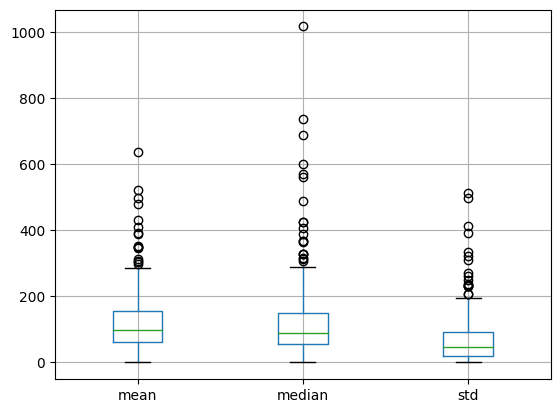

In [106]:
fam_tlsh = fam_tlsh[fam_tlsh['amount'] > 1]
fam_tlsh[["mean","median","std"]].boxplot()

<Axes: >

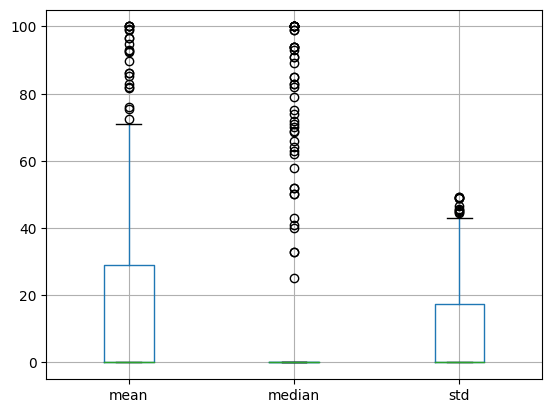

In [107]:
fam_ssdeep = fam_ssdeep[fam_ssdeep['amount'] > 1]
fam_ssdeep[["mean","median","std"]].boxplot()

# ROC Curve

To correctly get a ROC curve, 4 values are essential: TP, FP, TN, FN.

The problem currently is, that I do not have other samples which can have no match. All the samples have a match and therefore the TN rate is 0. Thus, I will add the same amount of malware samples and concatenate with the scicore db.

In [108]:
scicore_filtered["malware"] = False
size = scicore_filtered.shape[0] / 20
malware = pd.DataFrame(list(db["malware"].aggregate([{"$sample": {"size": size}}])))
malware["malware"] = True

scicore_concat = pd.concat([scicore_filtered, malware])

scicore_concat

,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc,strings,machoke,malware
0,0,DIAMOND,bdbbc7d10475610a47665613a15b523692f2e586e495bf...,1744592,{'ssdeep': '24576:0ZgkO8W6krEazzEHRyE5fx5j0Gkm...,sdhash hash,{'tlsh': 'T170858D1B66820CB9C492D53467E797F268...,Machoc hash,{'strings': 'T1C844E9E35DC61D198DD65718A3A7936...,NaN,False
1,1,DIAMOND,3e5b9caaa8ec0488d0ef6649fa3205af16cd286921fdf3...,1264648,{'ssdeep': '24576:N7RayWHeZhpVZNmHQ/0R223Vcqem...,sdhash hash,{'tlsh': 'T1FB457E47FAC358A8C097D538466FA1367A...,Machoc hash,{'strings': 'T1FC1409F28DC02D14C5E7532DA3D6866...,NaN,False
2,2,DIAMOND,3e7c7a7415567a30a6131c959448e136c1c4cd25e2755d...,7963768,{'ssdeep': '98304:O4g2u6YzoSU6Zr5CqeWRP07lRNMc...,sdhash hash,{'tlsh': 'T1A3868E03E687A468C8A6C43813DB91B3ED...,Machoc hash,{'strings': 'T1C7751AD30D8F2C209CAE73507295D13...,NaN,False
3,3,DIAMOND,6336bd767371ef854def756641f8af86dd591e62170eb8...,1599192,{'ssdeep': '24576:39vHSut4l6xFkIRp1IzwbIPGVild...,sdhash hash,{'tlsh': 'T112759F1B6BA208ADC892D53457E796F26C...,Machoc hash,{'strings': 'T1CD44E9E34CC62D198DD65718A3A7926...,NaN,False
5,5,RStudio-Server,8ed496fd927bf12ab2680275d12ae8d239c77f426345e8...,4364,{'ssdeep': '96:mKNT20vznhw3tngiBbGBsek3Kfy2wy3...,sdhash hash,{'tlsh': 'T150918C52B0542BB67974A378DBB71467E3...,Machoc hash,{'strings': 'T17791BD52B0552B763974A37CDB77246...,{'machoke': 'Not a valid binary file /users/st...,False
...,...,...,...,...,...,...,...,...,...,...,...
82,656389a13624482ac9d23ea5,GootLoader,c5b774d80285a2aaa04d387939b7353fb8a09154103032...,303851,{'ssdeep': '6144:1aaKxfCLY8CvGokOFmwTFbP6s3JdB...,sdhash hash,{'tlsh': 'T18B54B4D9734F116F4BA233AAE43B5149FF...,Machoc hash,{'strings': 'T1A64409E976C6212A873731AAE46F525...,NaN,True
83,658f1b1f5f823237b2e0b853,Bashlite,4eea08f4ac934773a39615f8a5b21dc07408a010ddd77b...,155620,NaN,NaN,NaN,NaN,{'strings': 'T16B23B72748258593A4835C8223F6B5A...,NaN,True
84,656388c73624482ac9d22c79,GandCrab,cfefadc02eba9aba80944df5b3ba3968ee87c1582ecad5...,71680,{'ssdeep': '1536:7ZZZZZZZZZZZZpXzzzzzzzzzzzzAD...,sdhash hash,{'tlsh': 'T103636C1DB2D1B293F1E396B9FAB57E2544...,Machoc hash,{'strings': 'T166D13BC795903E6C99666ACC84F5B78...,NaN,True
85,658f1fb35f823237b2e1a34c,KRBanker,8dc98d8e92c52b64c4141f67584b0c0d69697d2c2599d6...,254505,NaN,NaN,NaN,NaN,{'strings': 'T1F062C0C501E53ECC9386C2A993EC2D9...,NaN,True


In [109]:
a = scicore_concat.copy()
b = scicore_concat.copy()
c = scicore_concat.copy()
d = scicore_concat.copy()
a.dropna(subset=['tlsh'], inplace=True)
b.dropna(subset=['ssdeep'], inplace=True)
c.dropna(subset=['strings'], inplace=True)
d.dropna(subset=['machoke'], inplace=True)

a['tlsh'] = a['tlsh'].apply(lambda x: x['tlsh'] if 'tlsh' in x and isinstance(x, dict) else x)
a = a[a['tlsh'] != 'TNULL']
b['ssdeep'] = b['ssdeep'].apply(lambda x: x['ssdeep'] if 'ssdeep' in x and isinstance(x, dict) else x)

c['strings'] = c['strings'].apply(lambda x: x['strings'] if 'strings' in x and isinstance(x, dict) else x)
c = c[c['strings'] != 'TNULL']

d['machoke'] = d['machoke'].apply(lambda x: x['machoke'] if 'machoke' in x and isinstance(x, dict) else x)

# drop on row "machoke" if it starts with "Not"
d = d[~d['machoke'].str.startswith('Not')]
d = d[~d['machoke'].str.startswith('r2')]

# remove on "machoke" everything after "\t"
d['machoke'] = d['machoke'].apply(lambda x: x.split("\t")[0])

tlsh_df = a.copy()
ssdeep_df = b.copy()
strings_df = c.copy()
machoke_df = d.copy()
machoke_df


,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc,strings,machoke,malware
26,26,libgd,98323a0d7a04d490c8c3fa65eba54580d6424a105e9ea1...,12256,{'ssdeep': '192:G4MFkE1i1psbJcIflb1U2eVoc8Ngcf...,sdhash hash,{'tlsh': 'T16942944FE76259BFDAD94238588B0B7073...,Machoc hash,{'strings': 'T1EC31784CE67BE47779D73668770E0E1...,3db8a17a1a02300ec19ce261a02300e1a02300ec4d3411...,False
54,46,hwloc,fb0d766180b9b7660a152ac2a8f34038bbfde6d042341c...,18216,{'ssdeep': '192:GnR37uG3EE2ntzHlZfZZJVoRxsXAZs...,sdhash hash,{'tlsh': 'T1D782D98BDAE08937D4E05234589B0A2079...,Machoc hash,{'strings': 'T15871724D2579F53379A22578AA5C4C0...,3db8a17a1a02300e1a02300ec19ce261a02300ea247ec5...,False
55,47,hwloc,53b571e7d5faa63ffab2afadb549c0a217a4018bb8a180...,46688,{'ssdeep': '768:46R8Xdf+eMWtO3lkCKsooHtUJf6nP7...,sdhash hash,{'tlsh': 'T19C231A079BD18479D5E08130A9DB6B12A6...,Machoc hash,{'strings': 'T1663298120FA6D42377E20579FF94BF4...,3db8a17a1a02300ec19ce261a02300e1a02300e7c91cb3...,False
56,48,hwloc,839236bb57cfcc2db79239f199608ae30faf26c5efca13...,27216,{'ssdeep': '384:cbDbynRaDQt7U0J9Ug7TBtS/4UnQ1S...,sdhash hash,{'tlsh': 'T199C23D8BE7F14CBBD8D89630686B0B24A6...,Machoc hash,{'strings': 'T1B4C1B8851DBAB0137EA22A2CFF6D8D4...,3db8a17a1a02300ec19ce261a02300e1a02300ec4d3411...,False
57,49,hwloc,3cb3182958db8bf2b1cc137ae2ac0c618f97332c4aa564...,46712,{'ssdeep': '768:iaj3CUxjbUpOlmbVylUMqIhtVBHtUJ...,sdhash hash,{'tlsh': 'T1E32319079B918474C4D5C130ADDBAB26AA...,Machoc hash,{'strings': 'T10E2297270F66D423A6E20575FF94BE4...,3db8a17a1a02300ec19ce261a02300e1a02300e7c91cb3...,False
...,...,...,...,...,...,...,...,...,...,...,...
2042,1974,SeqPrep,957a077e1db255eb416420317fb4fa678d61be947919c4...,106776,{'ssdeep': '1536:3H8sLvPPk1YK1s7yLLu0g0HBlb/fW...,sdhash hash,{'tlsh': 'T1CFA3F73BFF67901DC34B96780DE280AD66...,Machoc hash,{'strings': 'T15232291601BEF822C7C3FA2AA34D485...,3db8a17a1a02300ec4d3411ec4d3411ec19ce261a02300...,False
2043,1975,SeqPrep,2023b37b9df662cda1454fdc0dfff693686d4ff9fb9ae2...,96360,{'ssdeep': '768:DpcvgRDFlFOCPku1cnTqZxXj7TUS8Y...,sdhash hash,{'tlsh': 'T1E193E83BFFA7901DC34A957809E381E2A6...,Machoc hash,{'strings': 'T115424C1615BEE422C2C3FA667388481...,3db8a17a1a02300e5713ec025713ec02c19ce26c4d3411...,False
2044,1976,SeqPrep,a2163b07a13d1b0a86db3f582e3ec6a8c2d9b45a7d85e0...,106816,{'ssdeep': '1536:ojAqutuBk1vrT4xl4FRlN1rUkLlb/...,sdhash hash,{'tlsh': 'T122A3F83BFF67901EC34B96380DE280AD66...,Machoc hash,{'strings': 'T1D932391601BEE822C3C3FA2AB34D485...,3db8a17a1a02300ec4d3411ec4d3411ec19ce261a02300...,False
2045,1977,Qhull,f1d0863b5c5bbbe387d77d724d49291152fcfd654c8498...,384752,{'ssdeep': '6144:RLnCLZZoerNhFTkojdX0ke6hJh62P...,sdhash hash,{'tlsh': 'T193845B9B37D218FDD8D28430825B5257FF...,Machoc hash,{'strings': 'T1B2A32AF12F40269395E301A68305625...,3db8a17a1a02300e153362cabde1558fc0dbd3be2ec3a4...,False


### TLSH Prediction Concat
To now correctly get the 4 essential values for the ROC curve, I will go through the concat dataset and compare to the scicore dataset. If the positive match is wrong then it is a FP. If no match gets found then it is a TN. If a scicore sample gets not matched to scicore dataset then it is a FN. If a scicore sample gets matched to a scicore sample then it is a TP.

In [110]:
# Function to generate a dataframe with all the possible combinations of the hashes. Reduces iloc overhead.
def tlsh_comb(df=tlsh_df, col='tlsh'):
    from itertools import combinations
    
    # Generate all binary combinations of the strings in the specified column
    string_combinations = combinations(df[[col, 'family', 'malware']].iterrows(), 2)
    
    # Apply tlsh.diff to each combination
    results = []
    for (idx1, row1), (idx2, row2) in string_combinations:
        diff_score = tlsh.diff(row1[col], row2[col])
        results.append((row1['family'], row2['family'], row1['malware'], row2['malware'], row1[col], row2[col], diff_score))
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results, columns=['Family 1', 'Family 2', 'Malware 1', "Malware 2", 'TLSH 1', 'TLSH 2', 'Diff Score'])
    
    return results_df


In [111]:
results_tlsh = tlsh_comb()
results_str = tlsh_comb(df=strings_df, col='strings')


In [112]:
p = results_tlsh.loc[results_tlsh.groupby("TLSH 1")["Diff Score"].idxmin()]
s = results_str.loc[results_str.groupby("TLSH 1")["Diff Score"].idxmin()]

In [113]:
def tlsh_thresh(s):
    s = s.loc[s.groupby("TLSH 1")["Diff Score"].idxmin()]
    ssdeep_th = pd.DataFrame(columns=["threshold", "true_positive_rate", "false_positive_rate"])
    comp_to_sci = s[s["Malware 1"] == False]
    compt_to_malware = s[s["Malware 2"] == True]
    for i in range (0,200,10):
        
        sci_th = comp_to_sci[comp_to_sci["Diff Score"] <= i]
        f_th = compt_to_malware[compt_to_malware["Diff Score"] >= i]
        
        TP = (sci_th["Family 1"] == sci_th["Family 2"]).sum()
        FP = (sci_th["Family 1"] != sci_th["Family 2"]).sum()
        FN = (f_th["Family 1"] != f_th["Family 2"]).sum()
        TN = (f_th["Family 1"] == f_th["Family 2"]).sum()
        
        TPR = TP / (TP + FN) if TP + FN != 0 else 0
        FPR = FP / (FP + TN) if FP + TN != 0 else 0
        # Append results to DataFrame
        ssdeep_th.loc[i] = [i, TPR, FPR]
    return ssdeep_th
p = tlsh_thresh(tlsh_comb())
s = tlsh_thresh(tlsh_comb(df=strings_df, col='strings'))

In [114]:
def tlsh_f1(s):
    s = s.loc[s.groupby('TLSH 1')["Diff Score"].idxmin()]
    ssdeep_th = pd.DataFrame(columns=["threshold", "f1", "accuracy", "precision", "recall"])
    comp_to_sci = s[s["Malware 1"] == False]
    compt_to_malware = s[s["Malware 2"] == True]
    for i in range (0,200,10):
        
        sci_th = comp_to_sci[comp_to_sci["Diff Score"] >= i]
        mal_th = compt_to_malware[compt_to_malware["Diff Score"] > i]
        f_th = compt_to_malware[compt_to_malware["Diff Score"] < i]
        
        TP = (sci_th["Family 1"] == sci_th["Family 2"]).sum()
        FP = (sci_th["Family 1"] != sci_th["Family 2"]).sum()
        FN = (f_th["Family 1"] != f_th["Family 2"]).sum()
        TN = (f_th["Family 1"] == f_th["Family 2"]).sum()
        
        precision = TP / (TP + FP) if TP + FP != 0 else 0
        recall = TP / (TP + FN) if TP + TN != 0 else 0
        
        f1 = (2 * precision * recall) / (precision + recall)
        accuracy = (TP + TN) / (TP + FP + FN + TN)
        # Append results to DataFrame
        ssdeep_th.loc[i] = [i, f1, accuracy, precision, recall]
    return ssdeep_th
f = tlsh_f1(tlsh_comb())
#f.plot(x="threshold", y=["f1","accuracy", "precisison", "recall"],title="F1 Score and Accuracy for TLSH")
f

,threshold,f1,accuracy,precision,recall
0,0.0,0.783233,0.643700,0.643700,1.000000
10,10.0,0.745098,0.597467,0.593750,1.000000
20,20.0,0.704416,0.548413,0.543705,1.000000
30,30.0,0.653161,0.490991,0.484959,1.000000
40,40.0,0.599857,0.435923,0.428425,1.000000
50,50.0,0.534704,0.374424,0.364912,1.000000
60,60.0,0.468394,0.319629,0.306233,0.995595
70,70.0,0.397386,0.265924,0.248366,0.993464
80,80.0,0.329932,0.224409,0.197959,0.989796
90,90.0,0.279379,0.199507,0.162791,0.984375


<Axes: title={'center': 'F1 Score and Accuracy for strings'}, xlabel='threshold'>

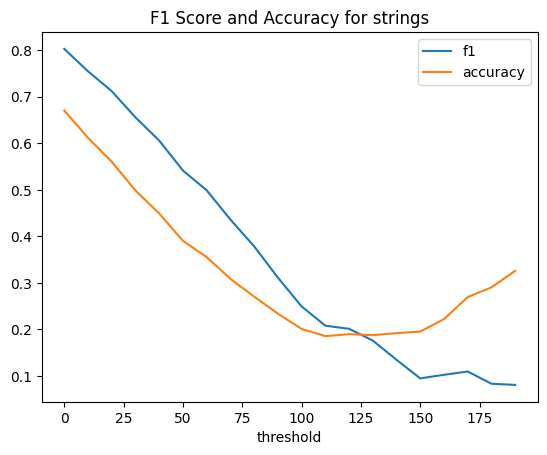

In [115]:
t_f1 = tlsh_f1(tlsh_comb(df=strings_df, col='strings'))
t_f1.plot(x="threshold", y=["f1","accuracy"],title="F1 Score and Accuracy for strings")

# SSDEEP
## Prediction

First I will define a function that will predict the family of a sample based on the score of the comparison. The score is the maximum score of the comparison of the sample to all other samples. If the score is 0, there is no match and the prediction is "No Match". If the score is higher than 0, the prediction is the family with the highest score, based on the threshold. Second, I will define a function that will calculate the ROC curve based on the predictions on the given thresholds.

In [116]:
def ssdeep_comb(df=ssdeep_df):
    from itertools import combinations
    
    # Generate all binary combinations of the strings in the specified column
    string_combinations = combinations(df[['ssdeep', 'family', 'malware']].iterrows(), 2)
    
    # Apply tlsh.diff to each combination
    results = []
    for (idx1, row1), (idx2, row2) in string_combinations:
        diff_score = ssdeep.compare(row1['ssdeep'], row2['ssdeep'])
        if diff_score == 0:
            results.append((row1['family'], "No Match", row1['malware'], row2['malware'], row1['ssdeep'], row2['ssdeep'], diff_score))
        else:
            results.append((row1['family'], row2['family'], row1['malware'], row2['malware'], row1['ssdeep'], row2['ssdeep'], diff_score))
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results, columns=['Family 1', 'Family 2', 'Malware 1', "Malware 2", 'ssdeep 1', 'ssdeep 2', 'Diff Score'])
    
    return results_df

In [117]:
result_ssdeep = ssdeep_comb()

In [118]:
def ssdeep_thresh(s):
    s = s.loc[s.groupby('ssdeep 1')["Diff Score"].idxmax()]
    ssdeep_th = pd.DataFrame(columns=["threshold", "true_positive_rate", "false_positive_rate"])
    comp_to_sci = s[s["Malware 1"] == False]
    compt_to_malware = s[s["Malware 2"] == True]
    for i in range (0,100,1):
        
        sci_th = comp_to_sci[comp_to_sci["Diff Score"] >= i]
        mal_th = compt_to_malware[compt_to_malware["Diff Score"] > i]
        f_th = compt_to_malware[compt_to_malware["Diff Score"] < i]
        
        TP = (sci_th["Family 1"] == sci_th["Family 2"]).sum()
        FP = (sci_th["Family 1"] != sci_th["Family 2"]).sum()
        FN = (f_th["Family 1"] != f_th["Family 2"]).sum()
        TN = (f_th["Family 1"] == f_th["Family 2"]).sum()
        
        TPR = TP / (TP + FN) if TP + FN != 0 else 0
        FPR = FP / (FP + TN) if FP + TN != 0 else 0
        # Append results to DataFrame
        ssdeep_th.loc[i] = [i, TPR, FPR]
    return ssdeep_th
d = ssdeep_thresh(ssdeep_comb())
d

,threshold,true_positive_rate,false_positive_rate
0,0.0,1.000000,1.00
1,1.0,0.912281,1.00
2,2.0,0.912281,1.00
3,3.0,0.912281,1.00
4,4.0,0.912281,1.00
...,...,...,...
95,95.0,0.759036,0.25
96,96.0,0.759036,0.25
97,97.0,0.727891,0.00
98,98.0,0.663866,0.00


In [127]:
s

,threshold,true_positive_rate,false_positive_rate
0,0.0,0.241758,0.000000
10,10.0,0.809392,0.233333
20,20.0,0.865759,0.258065
30,30.0,0.895770,0.382353
40,40.0,0.909804,0.525000
50,50.0,0.918824,0.600000
60,60.0,0.924342,0.738462
70,70.0,0.928866,0.810127
80,80.0,0.932087,0.861702
90,90.0,0.934535,0.918919


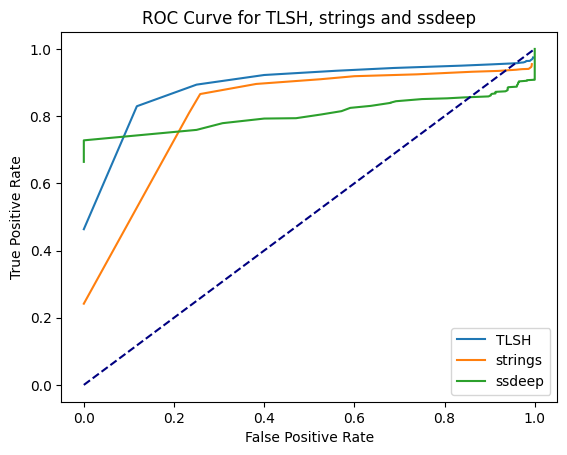

In [120]:
# plot the roc curve of variable 'd', 't', 's'
plt.plot(p["false_positive_rate"], p["true_positive_rate"], label="TLSH")
plt.plot(s["false_positive_rate"], s["true_positive_rate"], label="strings")
plt.plot(d["false_positive_rate"], d["true_positive_rate"], label="ssdeep")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for TLSH, strings and ssdeep")
plt.show()

In [121]:
def ssdeep_f1(s):
    s = s.loc[s.groupby('ssdeep 1')["Diff Score"].idxmax()]
    ssdeep_th = pd.DataFrame(columns=["threshold", "f1", "accuracy", "precision", "recall"])
    comp_to_sci = s[s["Malware 1"] == False]
    compt_to_malware = s[s["Malware 2"] == True]
    for i in range (1,100,1):
        
        sci_th = comp_to_sci[comp_to_sci["Diff Score"] >= i]
        mal_th = compt_to_malware[compt_to_malware["Diff Score"] > i]
        f_th = compt_to_malware[compt_to_malware["Diff Score"] < i]
        
        TP = (sci_th["Family 1"] == sci_th["Family 2"]).sum()
        FP = (sci_th["Family 1"] != sci_th["Family 2"]).sum()
        FN = (f_th["Family 1"] != f_th["Family 2"]).sum()
        TN = (f_th["Family 1"] == f_th["Family 2"]).sum()
        
        precision = TP / (TP + FP) if TP + FP != 0 else 0
        recall = TP / (TP + FN) if TP + TN != 0 else 0
        
        f1 = (2 * precision * recall) / (precision + recall)
        accuracy = (TP + FN) / (TP + FP + FN + TN)
        # Append results to DataFrame
        ssdeep_th.loc[i] = [i, f1, accuracy, precision, recall]
    return ssdeep_th
f = ssdeep_f1(ssdeep_comb())
f

,threshold,f1,accuracy,precision,recall
1,1.0,0.887940,0.875240,0.864865,0.912281
2,2.0,0.887940,0.875240,0.864865,0.912281
3,3.0,0.887940,0.875240,0.864865,0.912281
4,4.0,0.887940,0.875240,0.864865,0.912281
5,5.0,0.887940,0.875240,0.864865,0.912281
...,...,...,...,...,...
95,95.0,0.854237,0.932584,0.976744,0.759036
96,96.0,0.854237,0.932584,0.976744,0.759036
97,97.0,0.842520,0.936306,1.000000,0.727891
98,98.0,0.797980,0.922481,1.000000,0.663866


<Axes: title={'center': 'F1 Score for ssdeep'}, xlabel='threshold'>

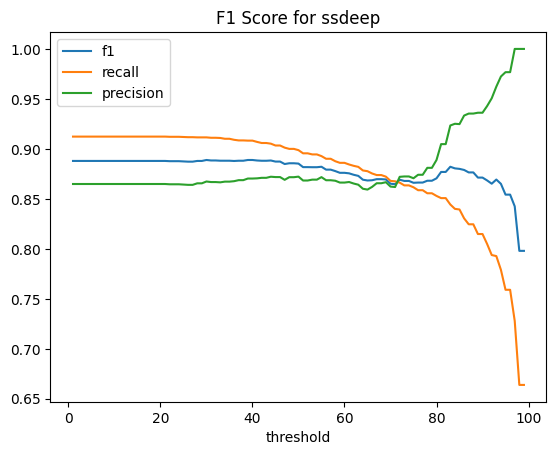

In [122]:
f.plot(x="threshold", y=["f1","recall", "precision"],title="F1 Score for ssdeep")

In [123]:
print(f'The optimal Threshold is: {(p["true_positive_rate"] - p["false_positive_rate"]).abs().idxmax()}')

The optimal Threshold is: 10


# Machoke

In [124]:
machoke_df

,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc,strings,machoke,malware
26,26,libgd,98323a0d7a04d490c8c3fa65eba54580d6424a105e9ea1...,12256,{'ssdeep': '192:G4MFkE1i1psbJcIflb1U2eVoc8Ngcf...,sdhash hash,{'tlsh': 'T16942944FE76259BFDAD94238588B0B7073...,Machoc hash,{'strings': 'T1EC31784CE67BE47779D73668770E0E1...,3db8a17a1a02300ec19ce261a02300e1a02300ec4d3411...,False
54,46,hwloc,fb0d766180b9b7660a152ac2a8f34038bbfde6d042341c...,18216,{'ssdeep': '192:GnR37uG3EE2ntzHlZfZZJVoRxsXAZs...,sdhash hash,{'tlsh': 'T1D782D98BDAE08937D4E05234589B0A2079...,Machoc hash,{'strings': 'T15871724D2579F53379A22578AA5C4C0...,3db8a17a1a02300e1a02300ec19ce261a02300ea247ec5...,False
55,47,hwloc,53b571e7d5faa63ffab2afadb549c0a217a4018bb8a180...,46688,{'ssdeep': '768:46R8Xdf+eMWtO3lkCKsooHtUJf6nP7...,sdhash hash,{'tlsh': 'T19C231A079BD18479D5E08130A9DB6B12A6...,Machoc hash,{'strings': 'T1663298120FA6D42377E20579FF94BF4...,3db8a17a1a02300ec19ce261a02300e1a02300e7c91cb3...,False
56,48,hwloc,839236bb57cfcc2db79239f199608ae30faf26c5efca13...,27216,{'ssdeep': '384:cbDbynRaDQt7U0J9Ug7TBtS/4UnQ1S...,sdhash hash,{'tlsh': 'T199C23D8BE7F14CBBD8D89630686B0B24A6...,Machoc hash,{'strings': 'T1B4C1B8851DBAB0137EA22A2CFF6D8D4...,3db8a17a1a02300ec19ce261a02300e1a02300ec4d3411...,False
57,49,hwloc,3cb3182958db8bf2b1cc137ae2ac0c618f97332c4aa564...,46712,{'ssdeep': '768:iaj3CUxjbUpOlmbVylUMqIhtVBHtUJ...,sdhash hash,{'tlsh': 'T1E32319079B918474C4D5C130ADDBAB26AA...,Machoc hash,{'strings': 'T10E2297270F66D423A6E20575FF94BE4...,3db8a17a1a02300ec19ce261a02300e1a02300e7c91cb3...,False
...,...,...,...,...,...,...,...,...,...,...,...
2042,1974,SeqPrep,957a077e1db255eb416420317fb4fa678d61be947919c4...,106776,{'ssdeep': '1536:3H8sLvPPk1YK1s7yLLu0g0HBlb/fW...,sdhash hash,{'tlsh': 'T1CFA3F73BFF67901DC34B96780DE280AD66...,Machoc hash,{'strings': 'T15232291601BEF822C7C3FA2AA34D485...,3db8a17a1a02300ec4d3411ec4d3411ec19ce261a02300...,False
2043,1975,SeqPrep,2023b37b9df662cda1454fdc0dfff693686d4ff9fb9ae2...,96360,{'ssdeep': '768:DpcvgRDFlFOCPku1cnTqZxXj7TUS8Y...,sdhash hash,{'tlsh': 'T1E193E83BFFA7901DC34A957809E381E2A6...,Machoc hash,{'strings': 'T115424C1615BEE422C2C3FA667388481...,3db8a17a1a02300e5713ec025713ec02c19ce26c4d3411...,False
2044,1976,SeqPrep,a2163b07a13d1b0a86db3f582e3ec6a8c2d9b45a7d85e0...,106816,{'ssdeep': '1536:ojAqutuBk1vrT4xl4FRlN1rUkLlb/...,sdhash hash,{'tlsh': 'T122A3F83BFF67901EC34B96380DE280AD66...,Machoc hash,{'strings': 'T1D932391601BEE822C3C3FA2AB34D485...,3db8a17a1a02300ec4d3411ec4d3411ec19ce261a02300...,False
2045,1977,Qhull,f1d0863b5c5bbbe387d77d724d49291152fcfd654c8498...,384752,{'ssdeep': '6144:RLnCLZZoerNhFTkojdX0ke6hJh62P...,sdhash hash,{'tlsh': 'T193845B9B37D218FDD8D28430825B5257FF...,Machoc hash,{'strings': 'T1B2A32AF12F40269395E301A68305625...,3db8a17a1a02300e153362cabde1558fc0dbd3be2ec3a4...,False


In [125]:
from itertools import combinations
from sklearn.metrics import jaccard_score
def jaccard_distance_sklearn(str1, str2, n=8):
    # Function to generate n-grams from a string
    def ngrams(s, n):
        return set([s[i:i+n] for i in range(len(s) - n + 1)])

    # Convert inputs to strings if they are not
    str1 = str(str1) if not isinstance(str1, str) else str1
    str2 = str(str2) if not isinstance(str2, str) else str2

    # Create n-grams for each string
    set1 = ngrams(str1, n)
    set2 = ngrams(str2, n)

    # Calculate Jaccard similarity and convert to distance
    if len(set1.union(set2)) == 0:  # Avoid division by zero
        return 1.0 if set1 != set2 else 0.0
    similarity = len(set1.intersection(set2)) / len(set1.union(set2))

    return similarity


def machoke_comb(df):
    # get jaccard distance of all combinations

    # Generate all binary combinations of the strings in the specified column
    string_combinations = combinations(df[['machoke', 'family', 'malware']].iterrows(), 2)
    results = []
    for (idx1, row1), (idx2, row2) in string_combinations:
    
        diff_score = jaccard_distance_sklearn(row1['machoke'], row2['machoke'])
        if diff_score == 0:
            results.append((row1['family'], "No Match", row1['malware'], row2['malware'], row1['machoke'], row2['machoke'], diff_score))
        else:
            results.append((row1['family'], row2['family'], row1['malware'], row2['malware'], row1['machoke'], row2['machoke'], diff_score))
    
    results_df = pd.DataFrame(results, columns=['Family 1', 'Family 2', 'Malware 1', "Malware 2", 'Machoke 1', 'Machoke 2', 'Diff Score'])
    return results_df

machoke_best = machoke_comb(df=machoke_df)

machoke_best

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# multiply machoke_best[score] by 100
machoke_best["Diff Score"] = machoke_best["Diff Score"] * 100

In [ ]:

(test["Family 1"] == test["Family 2"]).sum() / machoke_best.shape[0] * 100

In [ ]:
tlsh_comp = results_tlsh.loc[results_tlsh.groupby("TLSH 1")["Diff Score"].idxmin()]
ssdeep_comp = result_ssdeep.loc[result_ssdeep.groupby('ssdeep 1')["Diff Score"].idxmax()]
string_comp = results_str.loc[results_str.groupby("TLSH 1")["Diff Score"].idxmin()]
machoke_comp = machoke_best.loc[machoke_best.groupby('Machoke 1')["Diff Score"].idxmax()]
tls = []
ssd = []
strs = []
mach = []
for i in range (0,310,10):
    tlsh_comp_diff = tlsh_comp[tlsh_comp["Diff Score"] < i]
    string_comp_diff = string_comp[string_comp["Diff Score"] < i]
    tlsh_comp_diff = tlsh_comp_diff[tlsh_comp_diff["Malware 1"] == False]
    string_comp_diff = string_comp_diff[string_comp_diff["Malware 1"] == False]
    winrate_tlsh = (tlsh_comp_diff["Family 1"] == tlsh_comp_diff["Family 2"]).sum() / len(tlsh_comp_diff)
    winrate_str = (string_comp_diff["Family 1"] == string_comp_diff["Family 2"]).sum() / len(string_comp_diff)
    total_tlsh = len(tlsh_comp_diff) / len(tlsh_comp)
    total_str = len(string_comp_diff) / len(string_comp)
    tls.append((winrate_tlsh, 1-winrate_tlsh, total_tlsh, i))
    strs.append((winrate_str, 1-winrate_str, total_str, i))
for j in range (1,110,10):
    ssdeep_comp_diff = ssdeep_comp[ssdeep_comp["Diff Score"] >= j]
    machoke_comp_diff = machoke_comp[machoke_comp["Diff Score"] >= j]
    ssdeep_comp_diff = ssdeep_comp_diff[ssdeep_comp_diff["Malware 1"] == False]
    winrate = (ssdeep_comp_diff["Family 1"] == ssdeep_comp_diff["Family 2"]).sum() / len(ssdeep_comp_diff)
    win_machoke = (machoke_comp_diff["Family 1"] == machoke_comp_diff["Family 2"]).sum() / len(machoke_comp_diff)
    total = len(ssdeep_comp_diff) / len(ssdeep_comp)
    total_machoke = len(machoke_comp_diff) / len(machoke_best)
    ssd.append((winrate, 1-winrate, total,j))
    mach.append((win_machoke, 1-win_machoke, total_machoke,j))

In [ ]:
titi = pd.DataFrame(tls, columns=["winrate", "lossrate", "total", "threshold"])
sisi = pd.DataFrame(ssd, columns=["winrate", "lossrate", "total", "threshold"])
strt = pd.DataFrame(strs, columns=["winrate", "lossrate", "total", "threshold"])
mchc = pd.DataFrame(mach, columns=["winrate", "lossrate", "total", "threshold"])
#ti = titi.plot(x="threshold", y=["winrate","lossrate","total"],title="EDI Curve for TLSH")
#si = sisi.plot(x="threshold", y=["winrate","lossrate","total"],title="EDI Curve for ssdeep")

plt.clf()
fig, ax = plt.subplots(2,2, figsize=(15,10))
ax[0][0].plot(titi["threshold"], titi["winrate"], label="hitrate")
ax[0][0].plot(titi["threshold"], titi["lossrate"], label="missrate")
ax[0][0].plot(titi["threshold"], titi["total"], label="total")
ax[0][0].axvline(x=50, color='violet', linestyle='--', label='Safe')
ax[0][0].axvline(x=100, color='black', linestyle='--', label='Broad')
ax[0][0].legend()
ax[0][0].set_title("EDI Curve for TLSH")
ax[0][0].set_xlabel("Threshold")
ax[0][0].set_ylabel("Percentage")
ax[1][0].plot(sisi["threshold"], sisi["winrate"], label="hitrate")
ax[1][0].plot(sisi["threshold"], sisi["lossrate"], label="missrate")
ax[1][0].plot(sisi["threshold"], sisi["total"], label="total")
ax[1][0].axvline(x=6, color='black', linestyle='--', label='Intersection')
ax[1][0].legend()
ax[1][0].set_title("EDI Curve for ssdeep")
ax[1][0].set_xlabel("Threshold")
ax[1][0].set_ylabel("Percentage")
ax[0][1].plot(strt["threshold"], strt["winrate"], label="hitrate")
ax[0][1].plot(strt["threshold"], strt["lossrate"], label="missrate")
ax[0][1].plot(strt["threshold"], strt["total"], label="total")
ax[0][1].axvline(x=50, color='violet', linestyle='--', label='Safe')
ax[0][1].axvline(x=140, color='black', linestyle='--', label='Broad')
ax[0][1].legend()
ax[0][1].set_title("EDI Curve for strings")
ax[1][1].plot(mchc["threshold"], mchc["winrate"], label="hitrate")
ax[1][1].plot(mchc["threshold"], mchc["lossrate"], label="missrate")
ax[1][1].plot(mchc["threshold"], mchc["total"], label="total")
ax[1][1].axvline(x=10, color='violet', linestyle='--', label='Safe')
ax[1][1].axvline(x=80, color='black', linestyle='--', label='Broad')
ax[1][1].legend()
ax[1][1].set_title("EDI Curve for machoke")
plt.show()

In [ ]:
mchc

In [ ]:
machoke_comp.sort_values(by="Diff Score", ascending=False)